In [ ]:
!nvidia-smi

Thu Sep 16 04:55:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Projects/Github/MNIST_FASHION/train_LbELtWX.zip

In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
X=[]
for i in data['id']:
    path = '/content/train/' + str(i) + '.png'
    img = cv2.imread(path)
    img = cv2.resize(img,(64,64))
    X.append(img.astype('float32'))
    
X=np.array(X)


In [5]:
# np.save("X",X)
# X = np.load("X.npy")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


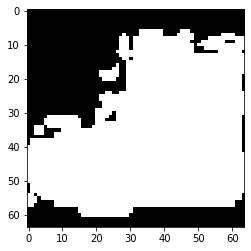

In [6]:
plt.imshow(X[0])

In [7]:
X = X / 255

In [8]:
Y=data['label']

In [9]:
Y = np.array(tf.one_hot(Y,10))

In [10]:
# X_train,X_val,Y_train,Y_val = train_test_split(X,Y,random_state=42,test_size=0.17)

In [11]:
# X_train.shape,Y_train.shape

In [12]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X[0].shape)
base_model.trainable = False ## Not trainable weights

In [13]:
# X = preprocess_input(X) 
# Y = preprocess_input(Y)

In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [15]:
model= tf.keras.Sequential([
# Model_1 Architecture
#     layers.Conv2D(256,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(128,3,activation='relu'),
#     layers.MaxPooling2D(2),
    
#     layers.Flatten(),
#     layers.Dense(512,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(216,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),
    
# Model_2 Architecture
#     layers.Conv2D(128,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(256,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(3),
    
#     layers.Flatten(),
#     layers.Dense(1024,activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(512,activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(128,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),

# # # Model_3 Architecture
#     layers.Conv2D(128,3,input_shape=(28,28,3),activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Conv2D(256,3 ,activation='relu'),
#     layers.MaxPooling2D(2),
#     layers.Flatten(),
#     layers.Dense(256,activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10,activation='softmax'),
    
      # VGG16 model
      base_model,
      layers.Flatten(),
      layers.Dense(50,activation = 'relu'),
      layers.Dense(20,activation = 'relu'),
      layers.Dense(10,activation = 'softmax') 
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                102450    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 14,818,368
Trainable params: 103,680
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
# model.to_gpu(0)

In [19]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(X, Y, epochs=50, validation_split=0.2, batch_size=128, callbacks=[es])

Epoch 1/50
375/375 [==============================] - 70s 110ms/step - loss: 0.7967 - accuracy: 0.7585 - val_loss: 0.4437 - val_accuracy: 0.8465
Epoch 2/50
375/375 [==============================] - 38s 101ms/step - loss: 0.3992 - accuracy: 0.8621 - val_loss: 0.3827 - val_accuracy: 0.8652
Epoch 3/50
375/375 [==============================] - 38s 101ms/step - loss: 0.3529 - accuracy: 0.8752 - val_loss: 0.3538 - val_accuracy: 0.8742
Epoch 4/50
375/375 [==============================] - 38s 102ms/step - loss: 0.3263 - accuracy: 0.8842 - val_loss: 0.3372 - val_accuracy: 0.8799
Epoch 5/50
375/375 [==============================] - 38s 102ms/step - loss: 0.3104 - accuracy: 0.8891 - val_loss: 0.3416 - val_accuracy: 0.8766
Epoch 6/50
375/375 [==============================] - 38s 102ms/step - loss: 0.2975 - accuracy: 0.8941 - val_loss: 0.3218 - val_accuracy: 0.8864
Epoch 7/50
375/375 [==============================] - 38s 102ms/step - loss: 0.2866 - accuracy: 0.8982 - val_loss: 0.3167 - val_ac

In [20]:
# !unzip /content/drive/MyDrive/Projects/Github/MNIST_FASHION/test_ScVgIM0.zip
data_test = pd.read_csv('/content/test.csv')
X_test=[]
for i in data_test['id']:
    path = '/content/test/' + str(i) + '.png'
    img = cv2.imread(path)
    img = cv2.resize(img,(64,64))
    X_test.append(img.astype('float32'))
    
X_test=np.array(X_test)
X_test = X_test / 255
X_test = preprocess_input(X_test) 

In [21]:
Y_test_pred = model.predict(X_test)

In [22]:
model.save('model_VGG16.model',save_format='h5')

In [23]:
!cp /content/model_VGG16.model /content/drive/MyDrive/Projects/Github/MNIST_FASHION